In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread('sIMG_2180.jpg')
img2 = cv2.circle(img1,(512,384),150, (255,0,255),-1)

In [3]:
img1.shape

(768, 1024, 3)

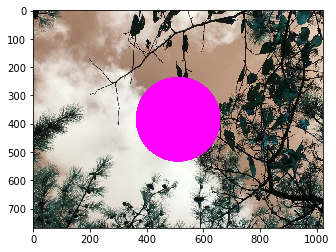

In [4]:
plt.imshow(img2)

In [5]:
x_glob = 0
y_glob = 0

def text_display(x,y):
    img2Text = img2.copy()
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    b = img2[y, x, 0] 
    g = img2[y, x, 1] 
    r = img2[y, x, 2]
        
    text = "Mouse Position : " + str(x) + ',' + str(y) + "; Color : (" + str(b) + ',' + str(g) + ',' + str(r) + ")"
    cv2.putText(img2Text, text, (30,40), font, 
                    1, (0, 255, 0), 2) 
    cv2.imshow('image', img2Text)

def mouse_event(event, x, y, flags, params):
    global x_glob
    global y_glob
    
    x_glob = x
    y_glob = y
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_MOUSEMOVE:
        text_display(x_glob,y_glob)

def nothing(x):
    pass

In [6]:
cv2.namedWindow('image')
cv2.createTrackbar('value','image',0,255,nothing)

while(1):
    cv2.imshow('image',img2)
    cv2.setMouseCallback('image', mouse_event) 
    
    text_display(x_glob,y_glob)
    
    k=cv2.waitKey(1)&0xFF
    if k==27:
        break
        
    # get current positions of four trackbars
    val=cv2.getTrackbarPos('value','image')
    img2 = cv2.circle(img1,(512,384),150, (255,0,val),-1)
        
cv2.destroyAllWindows()